### INTRODUCTION: Analysing House Sales in King County 
Introduction:  
Welcome to our data-driven exploration of the King County House Sales dataset! In this project, we’ll delve into the fascinating world of real estate, armed with regression modeling techniques. Our mission? To unravel the hidden patterns, predict housing prices, and provide valuable insights to stakeholders.

 The Dataset:  
The King County House Sales dataset is our treasure trove—a collection of information about home sales in a picturesque northwestern county. Each row represents a house, and the columns hold secrets about square footage, bedrooms, bathrooms, and more. But beware: like any good mystery, some column names are cryptic, and we’ll need our detective hats to decipher them.

Our Quest:  
Our stakeholder? Imagine a bustling real estate agency. They’re on a quest to empower homeowners with knowledge. Specifically, they want to advise homeowners on how renovations impact their home’s estimated value. Should you invest in that swanky kitchen remodel? Will that extra bedroom boost your asking price? Fear not—we’ll find answers!

Problem Statement:  
In the picturesque realm of King County, where rolling hills meet shimmering lakes, a bustling real estate agency seeks our expertise. Their mission? To empower homeowners with knowledge—knowledge that could sway the fate of kitchen renovations, bedroom additions, and backyard transformations.

Background:  
King County, nestled in the heart of the Pacific Northwest, boasts a diverse housing market. From cozy bungalows to modern mansions, each abode tells a story. But behind the charming facades lie mysteries: What factors truly influence home prices? How do renovations impact value? Our agency yearns for answers.

Objectives:  
1. Predictive Modeling for Homebuyers
Objective: Develop a robust predictive model to estimate housing prices based on key features.
Why?:  Homebuyers need accurate price estimates to make informed decisions. Whether they’re searching for a cozy bungalow or a modern townhouse, having a reliable prediction tool matters.
2. Investment Strategy for Sellers and Investors
Objective: Identify features that significantly impact housing prices.
Why?:  Sellers and investors want to maximize returns. Understanding which aspects—be it the number of bedrooms, lot size, or neighborhood—drive prices allows them to strategize effectively.
3. Neighborhood Insights for Urban Planners
Objective: Analyze neighborhood-level trends and disparities.
Why?:  Urban planners and policymakers aim for equitable development. By examining socioeconomic factors, school quality, and amenities, they can target interventions where they matter most.

 #### So, fellow data sorcerer, let’s unravel the spells woven within the King County House Sales dataset. Our wands? Jupyter notebooks and curiosity. Our quest? To illuminate the path for homeowners and unveil the magic of real estate.

### IMPORTS

In [2]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


### DATA LOADING

In [4]:
df = pd.read_csv("kc_house_data.csv")
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


### EDA And Data Cleaning

In [6]:
df.shape

(21597, 21)

1. Number of Rows (Observations): There are 21597 rows in the DataFrame.
2. Number of Columns (Variables): There are 21 columns (or variables) in the DataFrame.

#### Data info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Data description of Numerical Column

In [8]:
df.describe

<bound method NDFrame.describe of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view

#### looking for null values

In [9]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

##### The output indicates the count of missing values (NaN or null values) for each column in the Boston Housing dataset:
1. waterfront:2376 missing values , view: 63 missing values, INDUyr_renovated: 3842 missing values.
2. id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade, sqft_above, sqft_basement,  yr_built, zipcode, lat, long, sqft_living15, sqft_lot15: No missing values.

In [11]:
# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Fill NaN values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill NaN values in non-numeric columns with the mode or median if needed
# Example for filling with mode:
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# If you want to fill non-numeric columns with the median (which might not make sense for non-numeric data):
# for col in non_numeric_cols:
#     df[col].fillna(df[col].median(), inplace=True)

Rechecking for Null Values

In [13]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No Null values were found

### PAIR PLOT

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


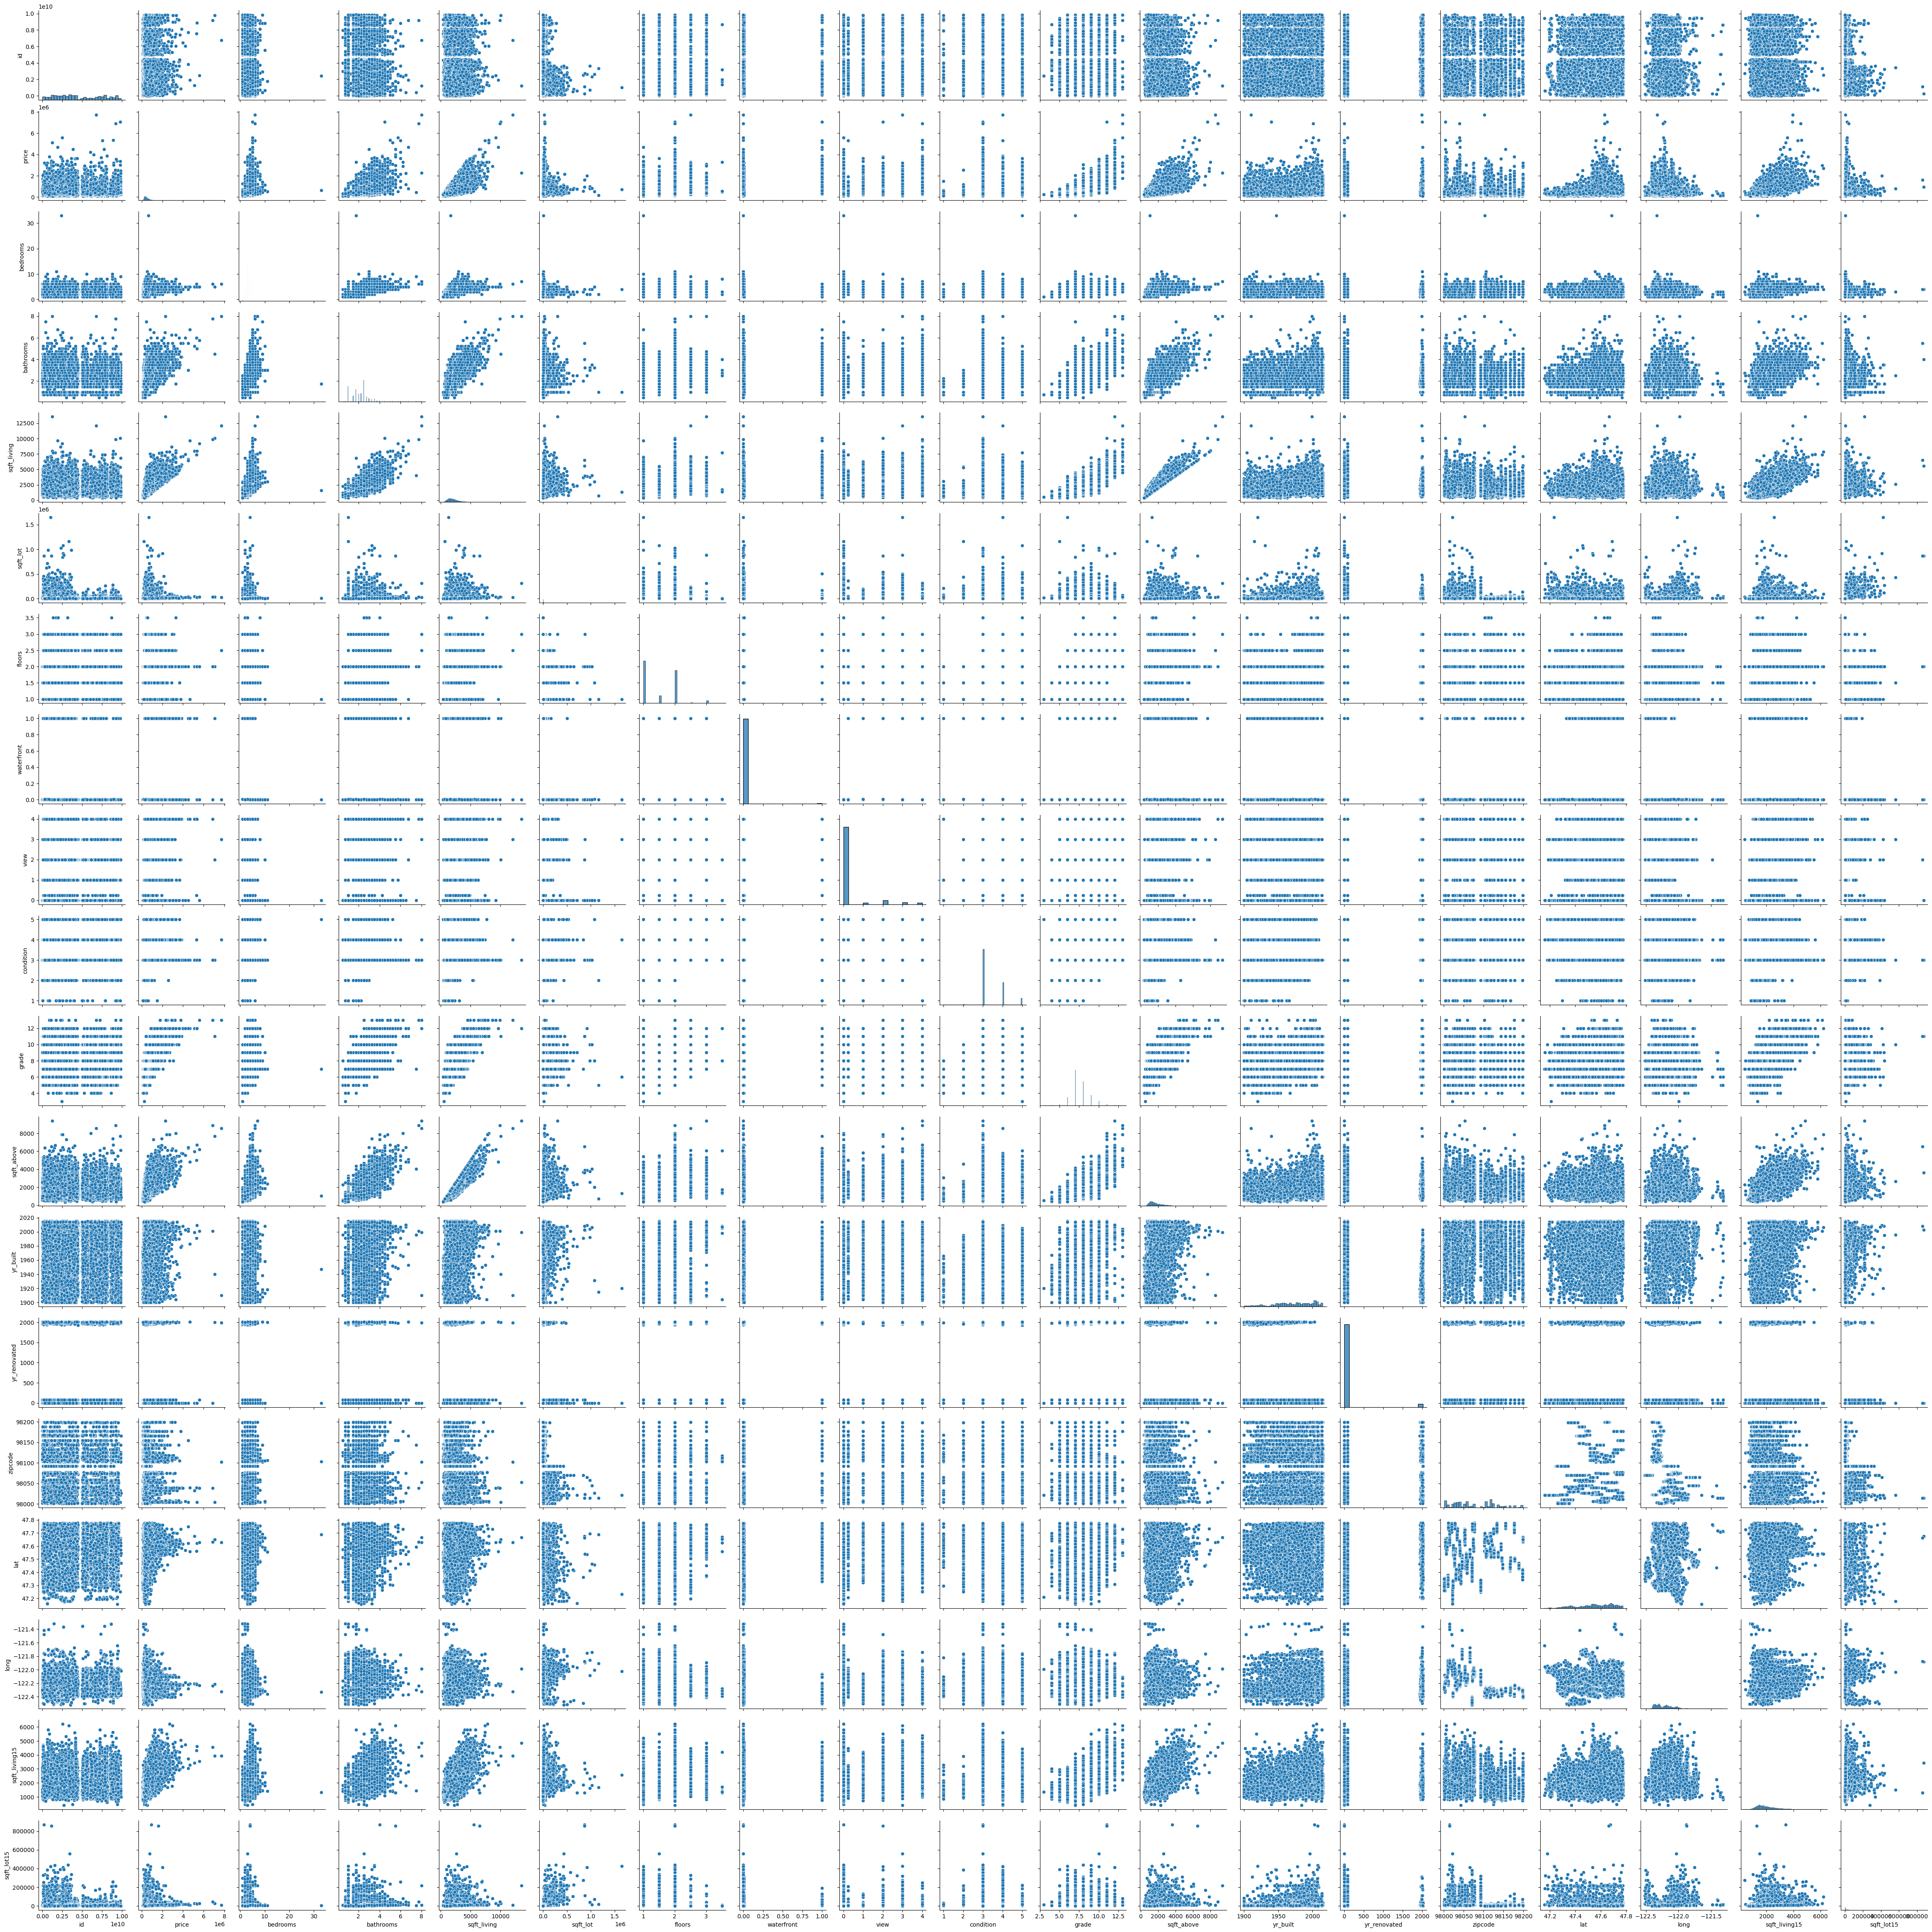

In [14]:
sns.pairplot(data=df)

Correlation HeatMap

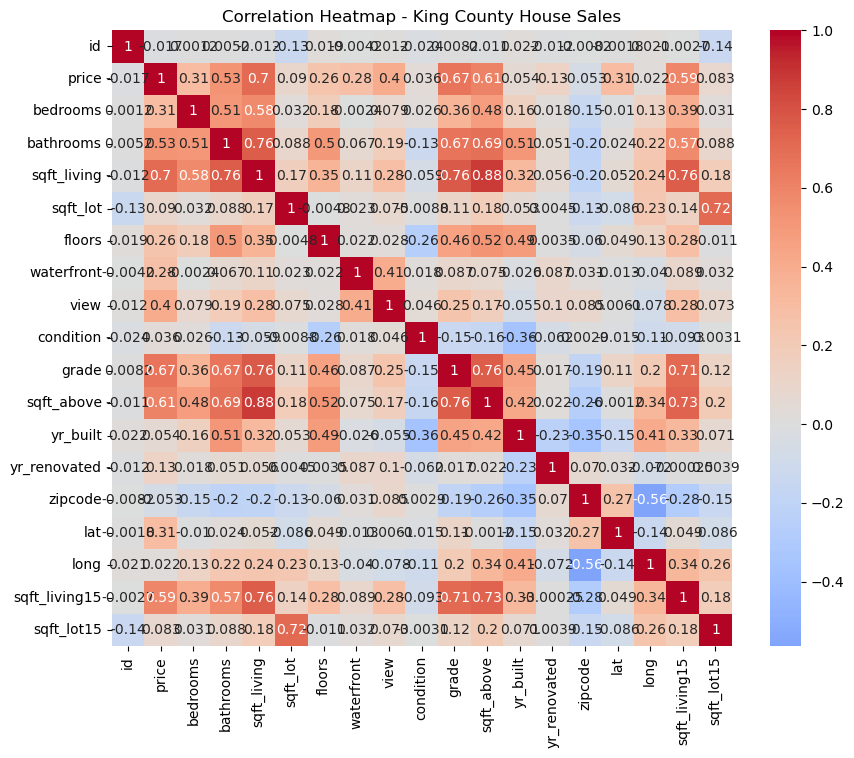

In [23]:

# Load your data into a DataFrame (replace 'your_file.csv' with your actual file)
kc = pd.read_csv('kc_house_data.csv')

# Exclude non-numeric columns for correlation calculation
kc_numeric = kc.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = kc_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, center=0)
plt.title("Correlation Heatmap - King County House Sales")
plt.show()



## Feature Selection

In [8]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

kc = pd.read_csv('kc_house_data.csv')

# Select relevant features and target variable
X = kc[['sqft_living', 'grade', 'bathrooms']]  # Replace with relevant columns
y = kc['price']

# Use SelectKBest to select top k features (adjust k as needed)
k_best = SelectKBest(score_func=f_regression, k=3)  # Choose an appropriate scoring function
X_selected = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['sqft_living', 'grade', 'bathrooms'], dtype='object')


c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


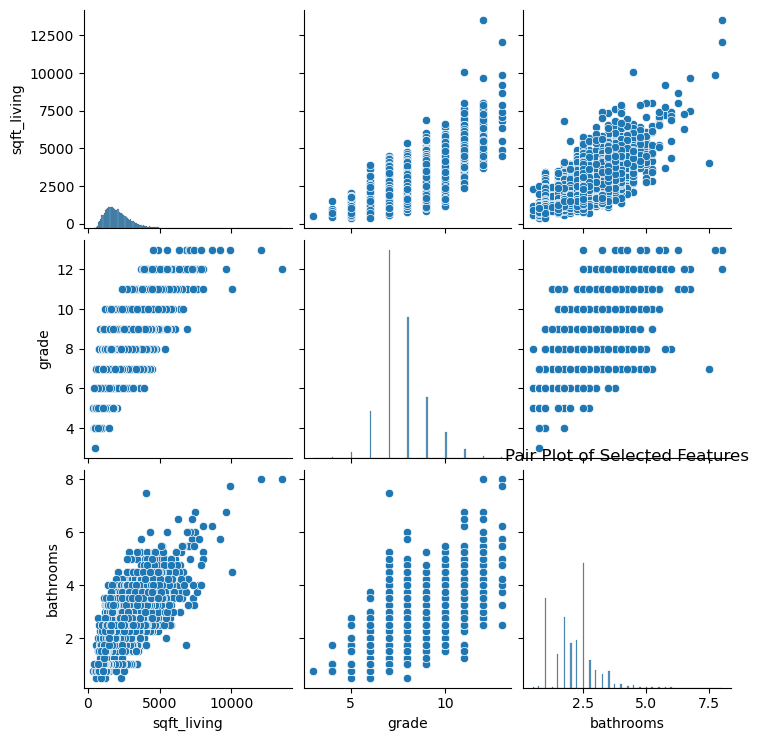

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'kc' is your DataFrame
sns.pairplot(kc[selected_features])
plt.title("Pair Plot of Selected Features")
plt.show()

In [10]:
# Calculate Q1, Q3, and IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
X_no_outliers = X[~((X < lower_bound) | (X > upper_bound)).any(axis=1)]

Check for Duplicates

In [17]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

# Save cleaned dataset
df_cleaned.to_csv('cleaned_file.csv', index=False)

# Check for duplicates
duplicates_exist = df_cleaned.duplicated().any()
if duplicates_exist:
    print("Duplicates still exist in the dataset.")
else:
    print("No duplicates found.")


No duplicates found.


# DATA ANALYSIS

### Objective 1: Predictive Modeling for Homebuyers
Linear Regression for Price Prediction:
We’ll build a linear regression model to estimate housing prices based on relevant features.

Mean Squared Error: 61048667496.10


c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


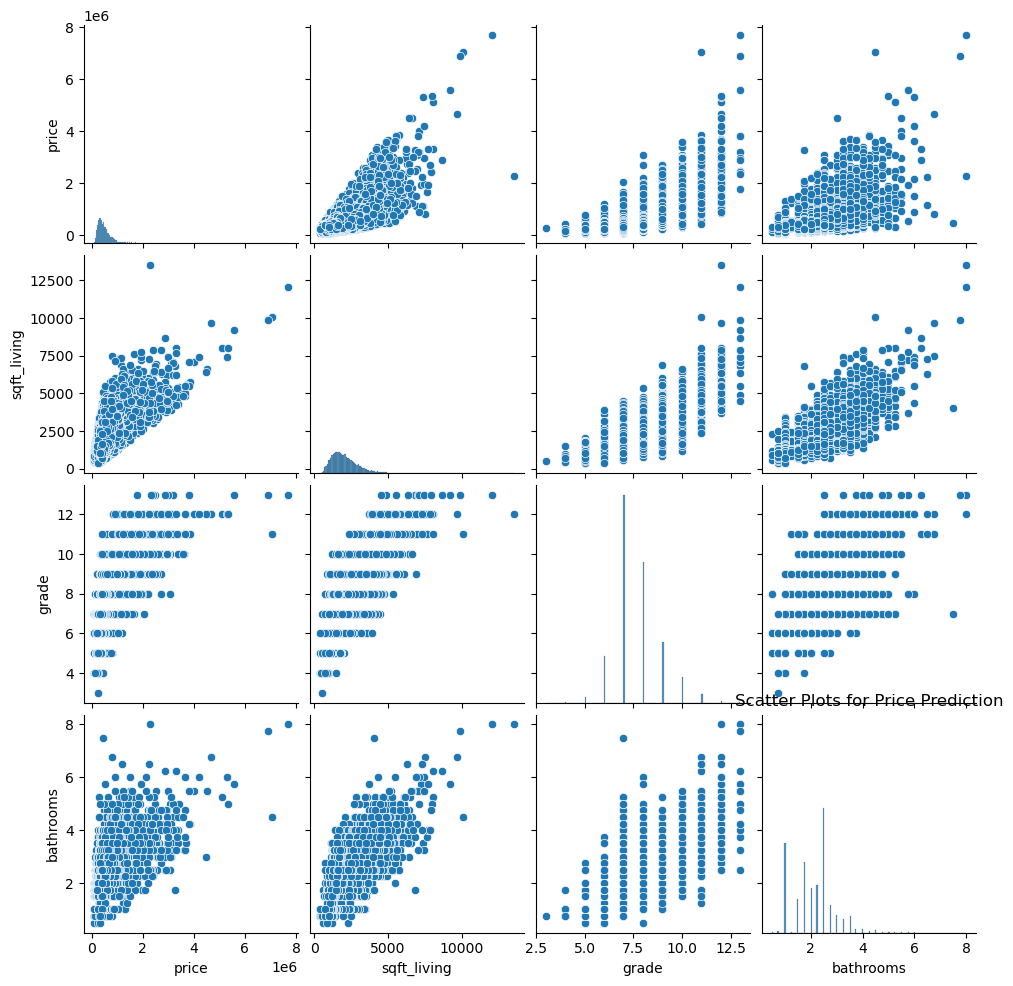

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

kc = pd.read_csv('kc_house_data.csv')

# Select relevant features
X = kc[['sqft_living', 'grade', 'bathrooms']]  # Replace with relevant columns
y = kc['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance (e.g., mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize scatter plots
sns.pairplot(kc[['price', 'sqft_living', 'grade', 'bathrooms']])
plt.title("Scatter Plots for Price Prediction")
plt.show()

### Trend Observations:
1. The scatter plot between house price and square footage of living area (sqft_living) shows a positive correlation. As the square footage increases, the price tends to increase.
2. Similarly, the plot between price and house grade also indicates a positive correlation. Higher-grade houses tend to have higher prices.
3. The relationship between price and the number of bathrooms shows that houses with more bathrooms tend to have higher prices, although this correlation is weaker compared to sqft_living or grade.
### Implications:
1. Sqft_living (square footage of living area) is a strong predictor for house pricing. Larger houses are generally valued more.
2. Grade, which reflects overall quality or construction standards, is also an important factor in determining price.
3. While the number of bathrooms contributes to price, it may not be as significant as sqft_living or grade.

### Objective 2: Investment Strategy for Sellers and Investors
Feature Importance from Tree-Based Model:
We’ll use a random forest model to identify features impacting prices. Here’s how:

Train a Random Forest Model:
Fit a random forest model to your data.
Extract feature importances.

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest model
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

# Get feature importances
feature_importances = forest.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: Importance = {importance:.4f}")

Feature 0: Importance = 0.5122
Feature 1: Importance = 0.3928
Feature 2: Importance = 0.0949


#### Feature Importances:
1. Feature 0 (sqft_living): Importance = 0.5122
2. Feature 1 (grade): Importance = 0.3928
3. Feature 2 (bathrooms): Importance = 0.0949
#### Trend Observations:
1. The most important feature is likely sqft_living, which represents the square footage of the living space. It has the highest impact on predicting housing prices.
2. The second most important feature is grade, which likely reflects the overall quality of the house (e.g., materials, design, construction).
3. bathrooms also contribute but to a lesser extent.
#### Implications:
1. For homebuyers: Consider the square footage (sqft_living) as a significant factor when estimating prices. Larger living spaces tend to command higher prices.
2. For sellers and investors: Focus on improving the overall quality (grade) of the property. Upgrades that enhance quality can positively impact prices.
3. Urban planners: Recognize that features like bathrooms play a smaller role in price prediction. Prioritize other factors (e.g., neighborhood amenities, school quality) for equitable development.

#### Objective 3: Neighborhood Insights for Urban Planners
Analyzing Neighborhood-Level Trends:
We’ll explore average prices and amenities at the neighborhood level. Here’s how:

Group Data by Neighborhood:
Aggregate data (e.g., average prices) by neighborhood.
Visualize Trends:
Create bar plots or other visualizations to show neighborhood-level insights

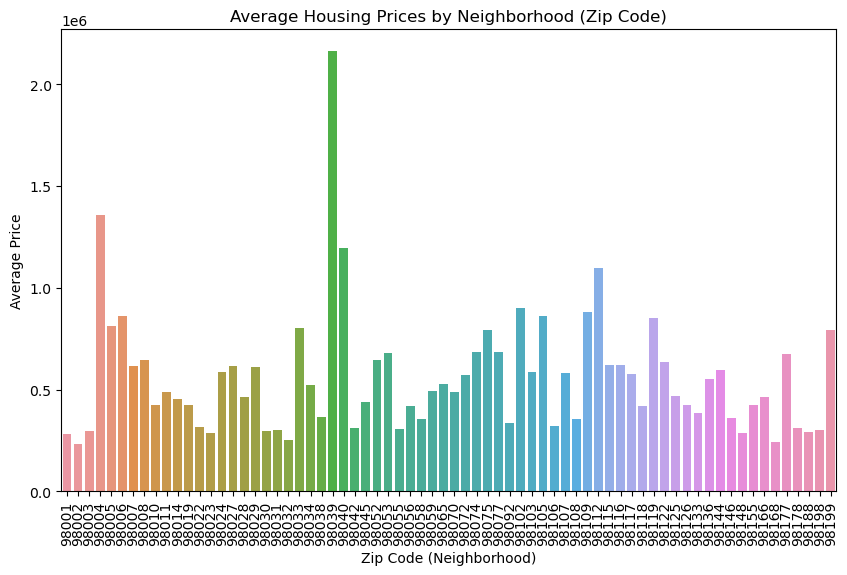

In [23]:

# Assuming 'zipcode' represents different neighborhoods
neighborhood_avg_prices = kc.groupby('zipcode')['price'].mean()

# Create a bar plot for average prices by neighborhood (zipcode)
plt.figure(figsize=(10, 6))
sns.barplot(x=neighborhood_avg_prices.index, y=neighborhood_avg_prices.values)
plt.xticks(rotation=90)
plt.xlabel("Zip Code (Neighborhood)")
plt.ylabel("Average Price")
plt.title("Average Housing Prices by Neighborhood (Zip Code)")
plt.show()

#### Trend Observation:

1. The housing prices vary significantly across different zip codes (neighborhoods).
2. Most neighborhoods have average prices below $200,000, as indicated by shorter bars.
3. However, there is one neighborhood with an average price close to one million, represented by a much taller bar.
#### Implications:

1. Affordability Disparities: The wide range of prices suggests affordability disparities. Some neighborhoods are more accessible to buyers, while others cater to higher-income residents.
2. Desirability and Amenities: The high-priced neighborhood likely offers desirable features (e.g., waterfront views, better schools, amenities). Urban planners should consider these factors when developing policies.
3. Market Dynamics: The variation impacts market dynamics—supply, demand, and investment patterns—within each zip code.
Equity Considerations: Policymakers must address equity by ensuring housing opportunities for diverse income groups.